#2. 퍼셉트론

#2.1 퍼셉트론이란


*   퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 체계
*   퍼셉트론 신호는 흐름을 만들고 정보를 앞으로 전달
*   퍼셉트론의 신호는 1 or 0 두가지의 논리값을 가질 수 있음
> 1 = 전류가 흐른다 / 0 = 전류가 흐르지 않는다 로 이해할 것

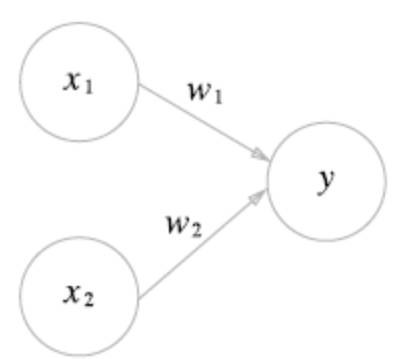

>퍼셉트론의 구조

*   x1, x2는 입력신호 y는 출력신호, w1, w2는 가중치(weight)를 의미한다.
*   그림의 원을 뉴런 또는 노드라고 부름
*   입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다
*  뉴런에서 전달 받은 신호의 총합이 임계값 θ를 넘을 때만 y를 출력



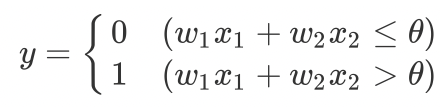

> 수식으로 나타낸 퍼셉트론
퍼셉트론은 복수의 입력신호에 각각 **고유한 가중치**를 부여한다
가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용하며, **가중치가 클수록 해당 신호가 그 만큼 중요함을 의미**한다

#2.2 단순한 논리회로

#AND gate

AND 게이트는 입력이 둘, 출력이 하나이다.

AND 게이트의 진리표에서 알 수 있듯, 두 입력이 모두 1일때만 1을 출력, 나머지는 0을 출력한다

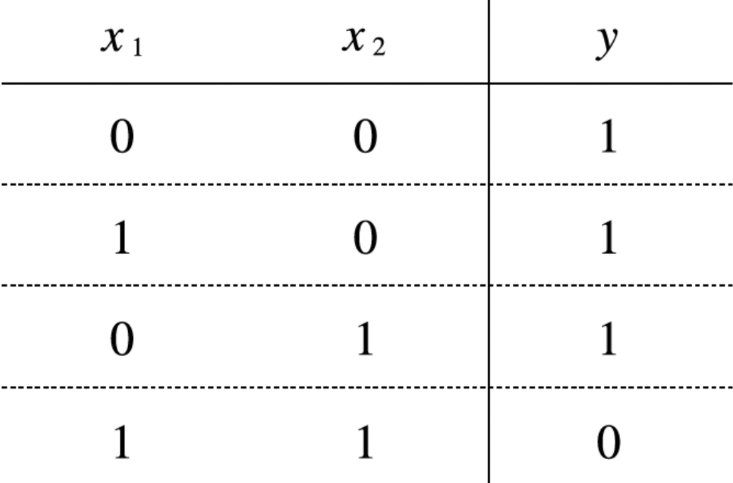
>AND 게이트의 진리표

In [1]:
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


#NAND 게이트와 OR 게이트
NAND는 NOT AND의 줄임말

AND게이트의 출력을 뒤집은 동작이다

진리표는 AND 게이트와 같으나 매개변수 부호가 모두 반전되는것만 유의

ex)  (w1​, w2​, θ) = (-0.5, -0.5, -0.8)


In [2]:
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


OR 게이트는 입력 신호중 하나 이상이 1이면 출력이 1이 되는 논리회로이다.

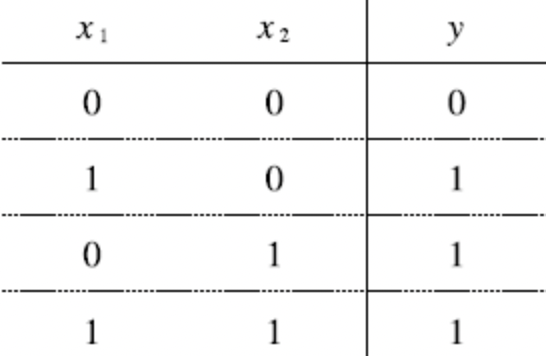
>OR 게이트의 진리표

In [3]:
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


#퍼셉트론의 한계

XOR 게이트는 배타적 논리합이라는 논리회로이다.

x 1​ 과 x 2​중 하나가 1일때만 1을 출력한다.


단층 퍼셉트론으로 AND, NAND, OR 게이트는 구현 가능하지만, XOR 게이트는 구현할 수 없다. 퍼셉트론은 아래와 같이 직선 으로 나뉜 두 영역을 만든다. 하지만 XOR은 직선으로 두 영역을 나눌 수 없다.


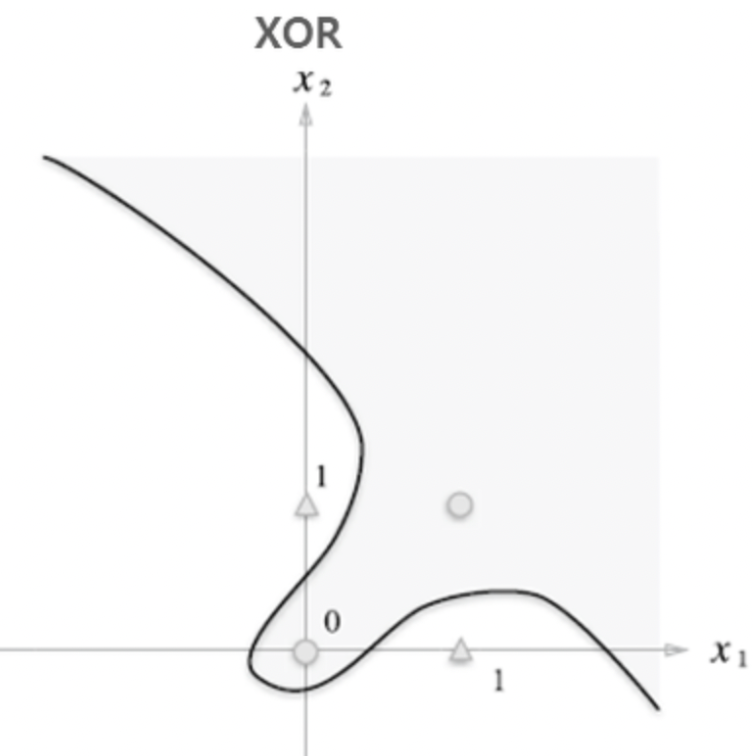

곡선인 경우에는 영역을 구분지을 수 있다. (비선형 영역)

따라서 퍼셉트론은 직선 하나로 나눈 영역만을 표현할 수 있다는 한계가 있다.

따라서

>단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다.  단층 퍼셉트론으로는 비선형 영역을 분리할 수 없다.

# 어떻게 해결해야 할까

>단층 퍼셉트론으로 XOR 게이트를 표현할 수 없다!

>퍼셉트론을 다층으로 구성하면 해결할 수 있다.

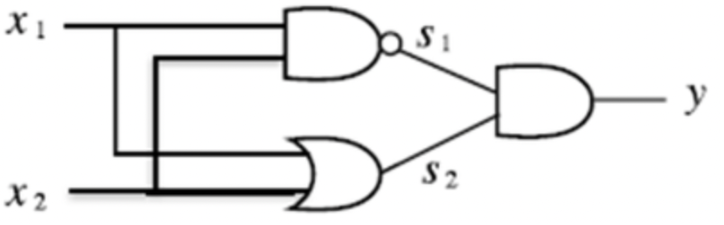

AND, NAND, OR 게이트를 조합한 XOR게이트 구조이다.

XOR 게이트의 진리표는 다음과 같다.


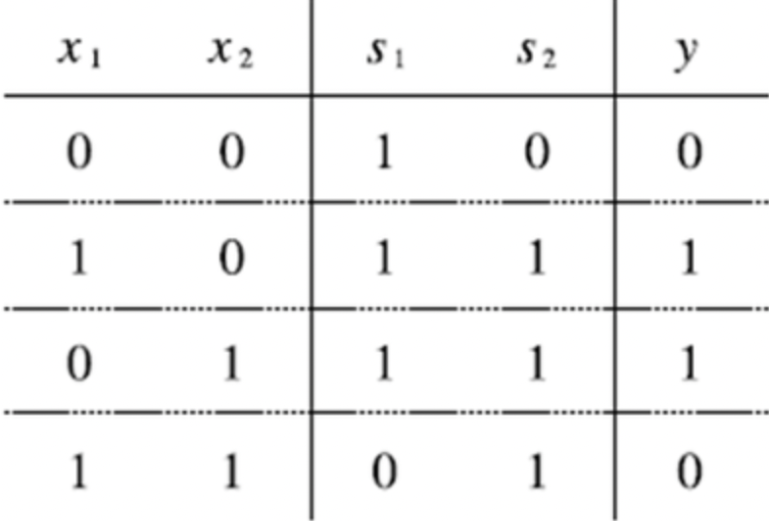

XOR의 퍼셉트론, 즉 다층구조의 네트워크는 다음과 같이 나타낸다.

왼쪽부터 차례로 0층, 1층, 2층 이라고 부른다.


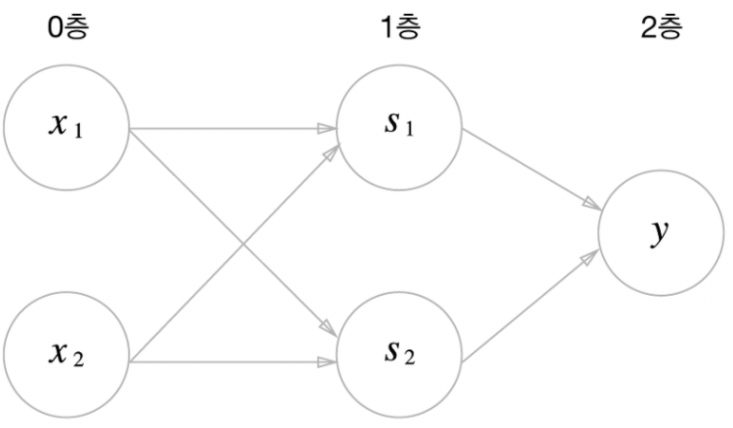

0층의 두 뉴런이 입력 신호를 받아서 1층의 뉴런으로 신호를 보냄

1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력

In [5]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 정리
*   퍼셉트론은 입출력을 갖춘 알고리즘
*   퍼셉트론은 입력을 주면, 정해진 규칙에 따른 값을 출력
*  퍼셉트론은 가중치와 편향을 매개변수로 설정
*  퍼셉트론으로 AND, OR 같은 논리회로 표현 가능
*  XOR 게이트는 단층 퍼셉트론 (직선)은 불가능하지만, 다층 퍼셉트론 (곡선)으로 구현 가능



